In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('00690.csv')
data.set_index(pd.to_datetime(data['Date'],format='%Y/%m/%d'),inplace=True)
data.drop('Date',axis=1,inplace=True)
data.head()

,Price
Date,
2017-03-31,19.91
2017-04-05,19.95
2017-04-06,19.93
2017-04-07,19.84
2017-04-10,19.80


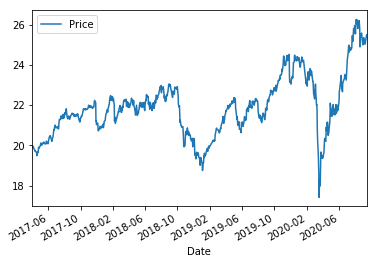

In [3]:
data.plot()

In [4]:
PMT=3000
M=3
BH=-0.2
N=2

start='2017-3-31'
end='2020-8-31'

In [5]:
df=data.copy()
dfm=df.resample('BM').last()
dfm=dfm.loc[start:end]
dfm['3M-returns']=dfm.pct_change(M)
dfm.head()

C:\Users\tinah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


,Price,3M-returns
Date,,
2017-03-31,19.91,NaN
2017-04-28,19.87,NaN
2017-05-31,20.08,NaN
2017-06-30,20.87,0.048217
2017-07-31,21.37,0.075491


In [6]:
total_cost_list=[]
unit_list=[]
pre_NAV_list=[0]
TR_list=[0]

for i, price in enumerate(dfm['Price']):
    if i==0:
        total_cost=PMT
        unit=PMT/price
        total_cost_list.append(total_cost)
        unit_list.append(unit)
    if i>0:
        if dfm['3M-returns'].iloc[i]<BH:
            total_cost+=N*PMT
            unit=unit+(N*PMT/price)
        else:
            total_cost+=PMT
            unit=unit+(PMT/price)
        pre_NAV=unit_list[i-1]*price
        TR=pre_NAV/total_cost_list[-1]-1
        total_cost_list.append(total_cost)
        unit_list.append(unit)
        pre_NAV_list.append(pre_NAV)
        TR_list.append(TR)

dfm['total_cost']=total_cost_list
dfm['unit']=unit_list
dfm['pre_NAV']=pre_NAV_list
dfm['total_return']=TR_list

In [7]:
dfm.head(50)

,Price,3M-returns,total_cost,unit,pre_NAV,total_return
Date,,,,,,
2017-03-31,19.91,NaN,3000,150.678051,0.000000,0.000000
2017-04-28,19.87,NaN,6000,301.659430,2993.972878,-0.002009
2017-05-31,20.08,NaN,9000,451.061821,6057.321358,0.009554
2017-06-30,20.87,0.048217,12000,594.808826,9413.660197,0.045962
2017-07-31,21.37,0.075491,15000,735.192541,12711.064610,0.059255
2017-08-31,21.57,0.074203,18000,874.274600,15858.103118,0.057207
2017-09-29,21.22,0.016770,21000,1015.650660,18552.107008,0.030673
2017-10-31,21.99,0.029013,24000,1152.076308,22334.158016,0.063531
2017-11-30,21.03,-0.025035,27000,1294.729661,24228.164760,0.009507


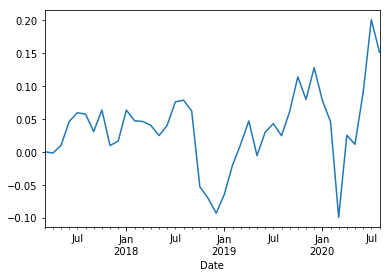

In [8]:
dfm['total_return'].plot()

In [9]:
print('TR: ',dfm['total_return'].iloc[-1]*100)
print('AR: ',((1+dfm['total_return'].iloc[-1])**(12/len(dfm))-1)*100)

TR:  15.126906281585327
AR:  4.106799531362992
